In [110]:
import pandas as pd

In [3]:
!pip install openpyxl


   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [open


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
df = pd.read_excel("data/OnlineRetail.xlsx",sheet_name='OnlineRetail')

In [112]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [113]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [114]:
df['InvoiceDate'].dt.month_name()

0         December
1         December
2         December
3         December
4         December
            ...   
541904    December
541905    December
541906    December
541907    December
541908    December
Name: InvoiceDate, Length: 541909, dtype: object

In [115]:
df['InvoiceDate'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 541909, dtype: int32

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [117]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [118]:
df = df.dropna(how='all',axis=0,subset=['CustomerID'])

In [119]:
df['CustomerID'] = df['CustomerID'].astype(str).str.replace(r'\.0$', '', regex=True)

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [121]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

In [122]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [123]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [124]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [125]:
df = df[df['TotalAmount']>0]

In [126]:
df.shape

(397884, 9)

In [127]:
snapshot_date=df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [128]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [129]:
rfm_df = df.groupby(by=['CustomerID']).agg(
    {
        "InvoiceNo" : "nunique",
        "TotalAmount": "sum",
        "InvoiceDate": lambda x: (snapshot_date - x.max()).days
    }
).reset_index()

In [130]:
df['CustomerID'].nunique()

4338

In [131]:
rfm_df = rfm_df.rename(columns={
    "InvoiceNo":"Frequency",
    "TotalAmount":"Monetery",
    "InvoiceDate":"Recency"
})

In [132]:
rfm_df.head()

,CustomerID,Frequency,Monetery,Recency
0,12346,1,77183.60,326
1,12347,7,4310.00,2
2,12348,4,1797.24,75
3,12349,1,1757.55,19
4,12350,1,334.40,310


In [136]:
rfm_df['F_SCORE'] = pd.qcut(rfm_df['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])

In [135]:
pd.qcut(rfm_df['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])

0       1
1       5
2       4
3       1
4       1
       ..
4333    2
4334    2
4335    3
4336    5
4337    4
Name: Frequency, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [137]:
rfm_df['M_SCORE'] = pd.qcut(rfm_df['Monetery'].rank(method='first'),q=5,labels=[1,2,3,4,5])

In [138]:
rfm_df['M_SCORE']

0       5
1       5
2       4
3       4
4       2
       ..
4333    1
4334    1
4335    1
4336    5
4337    4
Name: M_SCORE, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [140]:
rfm_df['R_SCORE'] = pd.qcut(rfm_df['Recency'].rank(method='first'),q=5,labels=[5,4,3,2,1])

In [141]:
rfm_df.head()

,CustomerID,Frequency,Monetery,Recency,F_SCORE,M_SCORE,R_SCORE
0,12346,1,77183.60,326,1,5,1
1,12347,7,4310.00,2,5,5,5
2,12348,4,1797.24,75,4,4,2
3,12349,1,1757.55,19,1,4,4
4,12350,1,334.40,310,1,2,1


In [145]:
rfm_df=rfm_df.astype({'F_SCORE':int,'M_SCORE':int,'R_SCORE':int})

In [146]:
rfm_df['RFM_SCORE'] = rfm_df['F_SCORE'] + rfm_df['M_SCORE'] + rfm_df['R_SCORE'] 

In [147]:
rfm_df.head()

,CustomerID,Frequency,Monetery,Recency,F_SCORE,M_SCORE,R_SCORE,RFM_SCORE
0,12346,1,77183.60,326,1,5,1,7
1,12347,7,4310.00,2,5,5,5,15
2,12348,4,1797.24,75,4,4,2,10
3,12349,1,1757.55,19,1,4,4,9
4,12350,1,334.40,310,1,2,1,4


In [148]:
def rfm_segment(row):
    if row['RFM_SCORE'] >= 13:
        return 'Champion'
    elif row['RFM_SCORE'] >= 9:
        return 'Loyal'
    elif row['RFM_SCORE'] >= 5:
        return 'SomeWhat Loyal'
    elif row['RFM_SCORE'] <= 3:
        return 'LOST'
    else:
        return 'Others'

In [150]:
rfm_df['segment']=rfm_df.apply(rfm_segment,axis=1)

In [151]:
rfm_df.head()

,CustomerID,Frequency,Monetery,Recency,F_SCORE,M_SCORE,R_SCORE,RFM_SCORE,segment
0,12346,1,77183.60,326,1,5,1,7,SomeWhat Loyal
1,12347,7,4310.00,2,5,5,5,15,Champion
2,12348,4,1797.24,75,4,4,2,10,Loyal
3,12349,1,1757.55,19,1,4,4,9,Loyal
4,12350,1,334.40,310,1,2,1,4,Others


In [152]:
import seaborn as sns

<Axes: xlabel='segment', ylabel='count'>

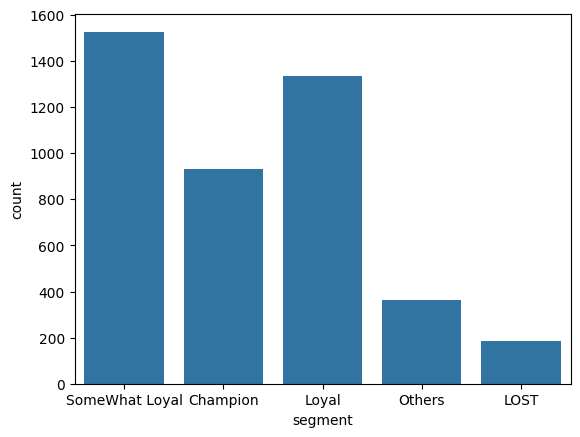

In [153]:
sns.countplot(x='segment',data=rfm_df)

In [154]:
rfm_df['segment'].value_counts()

segment
SomeWhat Loyal    1527
Loyal             1333
Champion           930
Others             364
LOST               184
Name: count, dtype: int64

In [155]:
rfm_df.to_csv('data/rfm_analysis.csv',index=False)